In [1]:
from pylab import *
import vdLJet

# Example Usage

In [2]:
config = {"F_0": 1.,           # The peak flux density at nu_0 (@ rest frame)
          "R_0": 3e8,          # Radius when flux density peaks at nu_0 (@ rest frame)
          "beta_b": 0.1,       # Expansion speed in units of c (@ rest frame)
          "theta_obs": 5,      # Observed opening angle (degrees)
          "inc": 30,           # Inclination angle (degrees)
          "tau_0": 1.76,       # Source opacity when the flux peaks at nu_0 
          "t_ej": 10.,         # Time of the ejection (observed)
          "nu_0": 2.3e11}      # Refer to F_0
time = arange(0, 1000, 1e-3)   # Timestamps to calculate the flux

In [3]:
# vdLJet.flux_nu_ej
# - Timestamps
# - Wavelength
# - config
# - mode (-1[approaching] or 1[receding])
res1 = vdLJet.flux_nu_ej(time, 2.3e11, config, -1)
res2 = vdLJet.flux_nu_ej(time, 2.3e11, config, 1)


# Reproduce Figure 5 of Tetarenko et al. (2017) @ 230 GHz

In [4]:
# From Tetarenko et al. (Table 2)
data = [[57195.4331, 39.73, 4.06, 1.96, 986.8, 0.290],
        [57195.4418, 58.80, 9.86, 2.6, 1672.6, 0.115],
        [57195.4733, 87.98, 5.36, 1.28, 3909.1, 0.574],
        [57195.4785, 68.47, 4.63, 1.58, 2050.1, 0.392],
        [57195.5213, 75.23, 5.15, 1.72, 5496.2, 0.861],
        [57195.5228, 85.51, 6.06, 1.71, 2404.7, 0.606],
        [57195.5275, 87.86, 6.95, 1.20, 1756.4, 0.186],
        [57195.5297, 87.84, 7.72, 2.10, 1491.9, 0.085]]

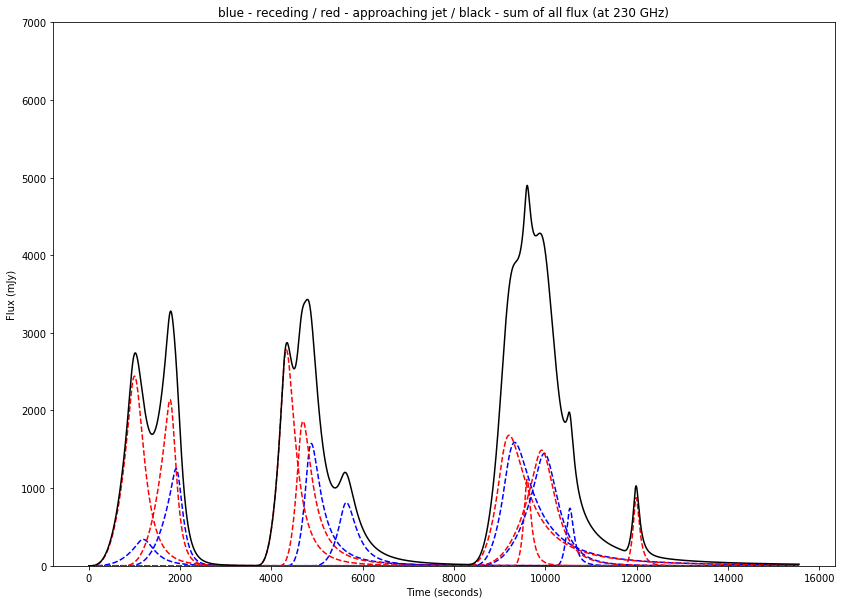

In [5]:
plt.figure(figsize=(14,10))

n_p = 100000
res = zeros([n_p])
time = linspace(0, 0.18, n_p)*24*60*60
for i in range(8):
    config = {"F_0": data[i][4]*1e-3, 
              # this is to fix R_O using equation 6
              "R_0": vdLJet._from_F_0_to_R_0(data[i][4]*1e-23, 2.39*3.09e19, data[i][3]), 
              "beta_b": data[i][5], 
              "theta_obs": data[i][2], 
              "inc": data[i][1], 
              "tau_0": data[i][3], 
              "t_ej": (data[i][0]-data[0][0])*24*60*60., 
              "nu_0": 2.3e11}
    tmp = vdLJet.flux_nu_ej(time, 2.3e11, config, 1, False)*1e3
    plt.plot(time, tmp, 'b--')
    res += tmp
    tmp = vdLJet.flux_nu_ej(time, 2.3e11, config, -1, False)*1e3
    plt.plot(time, tmp, 'r--')
    res += tmp
    
plt.plot(time, res, 'k-')
plt.ylim([0, 7e3])
plt.ylabel("Flux (mJy)")
plt.xlabel("Time (seconds)")
plt.title("blue - receding / red - approaching jet / black - sum of all flux (at 230 GHz)")
plt.savefig("results/Tetarenko_jet.png")